## snp density results
achen@2020-11-22

In [1]:
import pandas as pd
import os
import glob
from Bio import Seq
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import re
from scipy.stats import wilcoxon,mannwhitneyu
import numpy as np

In [9]:
#1-114:H
#115+:L
res = []
with open('/data1/chenyaowen/workspace/metaSNP_finalversion/liupu/step9_snpdensity/densityMatrix.txt','r') as inpf:
    for line in inpf:
        line = line.strip()
        tmparr = line.split(' ')
        genome = tmparr[0]
        i = 0
        for item in tmparr[1:]:
            i += 1
            if i<=114:
                res.append([genome,'H',float(item)])
            else:
                res.append([genome,'L',float(item)])
res_df = pd.DataFrame(res,columns = ['genome','type','snp density'])

In [11]:
res_df = res_df[res_df['snp density'] > 0]

In [42]:
genome_order = res_df[res_df['type']=='L'].groupby('genome').agg({'snp density':np.median}).sort_values(by='snp density').index.to_list()

Text(0.5, 0, 'SNP Density')

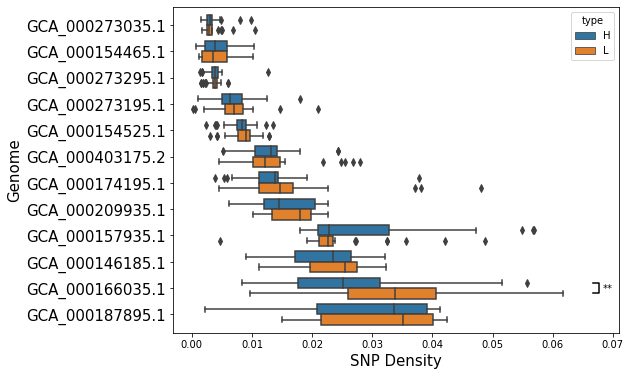

In [60]:
plt.figure(figsize=(8,6))
g = sns.boxplot(data=res_df,y='genome',x='snp density',hue='type',order=genome_order)

y1, y2 = 9.8, 10.2   
x, h, col = res_df['snp density'].max() + 0.005, 0.001, 'k'
plt.plot([x, x+h, x+h, x], [y1, y1, y2, y2], lw=1.5, c=col)
plt.text(x+0.0015,10,  "**", va='center', color=col)

plt.yticks(fontsize=15)
plt.ylabel('Genome',fontsize=15)
plt.xlabel('SNP Density',fontsize=15)

In [48]:
g.get_yticklabels()

[Text(0, 0, 'GCA_000273035.1'),
 Text(0, 1, 'GCA_000154465.1'),
 Text(0, 2, 'GCA_000273295.1'),
 Text(0, 3, 'GCA_000273195.1'),
 Text(0, 4, 'GCA_000154525.1'),
 Text(0, 5, 'GCA_000403175.2'),
 Text(0, 6, 'GCA_000174195.1'),
 Text(0, 7, 'GCA_000209935.1'),
 Text(0, 8, 'GCA_000157935.1'),
 Text(0, 9, 'GCA_000146185.1'),
 Text(0, 10, 'GCA_000166035.1'),
 Text(0, 11, 'GCA_000187895.1')]